In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import pearsonr
import numpy as np
# remove all warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
ct = 'DG_Glut'

In [3]:
gene_meta = pd.read_csv('/data/ref/gencode.vM22.basic.annotation.gene.flat.tsv.gz', sep = '\t')

In [4]:
rna = pd.read_csv(f"ml_input/{ct}/{ct}.luisa_RNA_DEG.csv", index_col=0)
rna['gene_type'] = rna.index.map(gene_meta.set_index('gene_name')['gene_type'].to_dict())
#rna = pd.read_csv(f"ml_input/{ct}.luisa_RNA_DEG.csv", index_col=0)
rna['chrom'] = rna.index.map(gene_meta.set_index('gene_name')['chrom'].to_dict())
rna = rna[~rna['chrom'].isin(['chrM','chrX','chrY'])]
rna.head()

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,DEG,gene_type,chrom
Nrg1,0.0,-1.279634,0.512,0.836,0.0,1,protein_coding,chr8
Snhg11,0.0,-1.234044,0.407,0.702,0.0,1,protein_coding,chr2
Zfp804b,0.0,-1.415103,0.266,0.536,0.0,1,protein_coding,chr5
Nrxn3,0.0,-1.176254,0.774,0.985,0.0,1,protein_coding,chr12
Camk2d,0.0,-3.280839,0.032,0.242,0.0,1,protein_coding,chr3


In [5]:
use_gene_type  = ['protein_coding','lncRNA']
rna = rna[rna['gene_type'].isin(use_gene_type)]
rna['DEG'].value_counts()

DEG
 0    5264
-1    2541
 1     183
Name: count, dtype: int64

In [7]:
atac_rpm = pd.read_csv(f"ml_input/{ct}/{ct}.peak_gene.csv")
atac_rpm = atac_rpm[atac_rpm['gene_name'].isin(rna.index)]
atac_rpm['log2(18mo/2mo)'] = np.log2(atac_rpm['18mo']/atac_rpm['2mo'])
atac_rpm.head()

,chrom,peak_start,peak_end,2mo,9mo,18mo,gene_chrom,gene_start,gene_end,gene_id,strand,gene_name,gene_type,DAR,log2(18mo/2mo)
0,chr1,3204691,3205192,1.145461,1.075275,0.968466,chr1,3203901,3673498,ENSMUSG00000051951.5,-,Xkr4,protein_coding,0.0,-0.242154
1,chr1,3208870,3209371,0.645063,0.466203,0.398780,chr1,3203901,3673498,ENSMUSG00000051951.5,-,Xkr4,protein_coding,0.0,-0.693846
2,chr1,3210193,3210694,2.222146,1.932487,1.435609,chr1,3203901,3673498,ENSMUSG00000051951.5,-,Xkr4,protein_coding,0.0,-0.630291
3,chr1,3210788,3211289,0.315417,0.278218,0.235470,chr1,3203901,3673498,ENSMUSG00000051951.5,-,Xkr4,protein_coding,0.0,-0.421714
4,chr1,3209692,3210193,0.640320,0.503800,0.383589,chr1,3203901,3673498,ENSMUSG00000051951.5,-,Xkr4,protein_coding,0.0,-0.739232


In [8]:
dmr = pd.read_csv(f"ml_input/{ct}/{ct}.aDMR_gene.csv", index_col=0)
dmr = dmr[dmr['gene_name'].isin(rna.index)]
dmr.head()
# differece among age groups, gene_length, distance_to_gene, dmr_length, dmr_number


,start,end,dmr_id,2mo,9mo,18mo,gene_chr,gene_start,gene_end,gene_id,gene_strand,gene_name,gene_type,old-young
chr,,,,,,,,,,,,,,
chr1,6846251,6846299,chr1-6846251-6846299,0.81,0.68,0.56,chr1,6485231,6862940,ENSMUSG00000033740.13,+,St18,protein_coding,-0.25
chr1,12806641,12806697,chr1-12806641-12806697,0.26,0.41,0.48,chr1,12690277,12863192,ENSMUSG00000016918.11,+,Sulf1,protein_coding,0.22
chr1,16997243,16997421,chr1-16997243-16997421,0.60,0.52,0.39,chr1,16896185,17093631,ENSMUSG00000101640.1,+,Gm28376,antisense,-0.21
chr1,16997243,16997421,chr1-16997243-16997421,0.60,0.52,0.39,chr1,16962560,17099889,ENSMUSG00000042686.5,-,Jph1,protein_coding,-0.21
chr1,21462161,21462164,chr1-21462161-21462164,0.73,0.61,0.49,chr1,21396403,21963942,ENSMUSG00000028033.12,-,Kcnq5,protein_coding,-0.24


In [9]:
dmg = pd.read_csv(f"ml_input/{ct}/{ct}.mCG_genebody_gene.csv", index_col=0)
dmg = dmg[dmg['gene_name'].isin(rna.index)]
dmg['norm_methylation_change'] = dmg['methylation_change'] * dmg['gene_length']
dmg.head()

,pvalue,corrected_pvalue,18mo,2mo,9mo,gene_length,celltype,methylation_change,abs_change,trend,DMG,gene_name,norm_methylation_change
geneslop2k,,,,,,,,,,,,,
ENSMUSG00000017679.16,3.254451e-01,1.000000,1.000343,0.991311,0.996102,16699,DG_Glut,0.009032,0.009032,NaN,0,Ttpal,150.829534
ENSMUSG00000078671.11,5.719650e-01,1.000000,0.980045,0.982660,0.980412,115192,DG_Glut,-0.002615,0.002615,NaN,0,Chd2,-301.237929
ENSMUSG00000041958.10,2.468463e-07,0.000012,0.891960,0.859345,0.894681,14367,DG_Glut,0.032615,0.032615,NaN,0,Pigs,468.580647
ENSMUSG00000020946.13,2.215885e-04,0.005865,0.880398,0.865708,0.892902,21049,DG_Glut,0.014690,0.014690,NaN,0,Gosr2,309.206921
ENSMUSG00000034781.5,7.238103e-05,0.002122,0.804740,0.798703,0.829923,16466,DG_Glut,0.006037,0.006037,NaN,0,Gna11,99.408134


In [10]:
dmg_ch = pd.read_csv(f"ml_input/{ct}/{ct}.mCH_genebody_gene.csv", index_col=0)
dmg_ch = dmg_ch[dmg_ch['gene_name'].isin(rna.index)]
dmg_ch['norm_methylation_change'] = dmg_ch['methylation_change'] * dmg_ch['gene_length']
dmg_ch.head()

,pvalue,corrected_pvalue,18mo,2mo,9mo,gene_length,celltype,methylation_change,abs_change,trend,DMG,gene_name,norm_methylation_change
geneslop2k,,,,,,,,,,,,,
ENSMUSG00000035399.12,7.074066e-07,3.853102e-04,2.036917,1.925022,2.036214,18875,DG_Glut,0.111895,0.111895,Aging Hyper,-1,Oser1,2112.026468
ENSMUSG00000038764.14,4.279776e-29,7.954023e-25,1.546082,1.673861,1.551992,110996,DG_Glut,-0.127779,0.127779,Aging Hypo,1,Ptpn3,-14182.985120
ENSMUSG00000063952.16,5.583102e-14,1.755984e-10,1.276680,1.379898,1.306009,38859,DG_Glut,-0.103218,0.103218,Aging Hypo,1,Brpf3,-4010.946684
ENSMUSG00000048232.12,5.698541e-20,3.603062e-16,1.397854,1.512737,1.411567,50357,DG_Glut,-0.114883,0.114883,Aging Hypo,1,Fbxo10,-5785.160512
ENSMUSG00000070287.3,9.644012e-08,7.622119e-05,1.545670,1.648563,1.558297,18902,DG_Glut,-0.102894,0.102894,Aging Hypo,1,Slc35g2,-1944.894656


In [14]:
loop

,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,21,22
0,,,,,,,,,,,,,,,,,,,,,
chr1,3100000,3110000,chr1,3400000,3410000,0.635926,34.182580,2.416174,0.002807,0.002384,...,0.044727,0.119007,0,chr1,3100016,3104125,ENSMUSG00000064842.1,+,Gm26206,snRNA
chr1,3100000,3110000,chr1,3420000,3430000,2.407307,27.711254,1.082402,0.003030,0.002189,...,0.059812,0.111905,0,chr1,3100016,3104125,ENSMUSG00000064842.1,+,Gm26206,snRNA
chr1,3100000,3110000,chr1,3430000,3440000,3.186451,31.353325,2.305675,0.002938,0.002243,...,0.051179,0.127769,0,chr1,3100016,3104125,ENSMUSG00000064842.1,+,Gm26206,snRNA
chr1,3100000,3110000,chr1,3440000,3450000,5.206938,29.662554,1.694190,0.002779,0.002293,...,0.075505,0.144651,0,chr1,3100016,3104125,ENSMUSG00000064842.1,+,Gm26206,snRNA
chr1,3100000,3110000,chr1,3450000,3460000,3.630835,28.548758,0.993784,0.002604,0.002375,...,0.102928,0.143655,0,chr1,3100016,3104125,ENSMUSG00000064842.1,+,Gm26206,snRNA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chr19,60550000,60560000,chr19,60480000,60490000,3.364248,9.657704,1.076062,0.008261,0.006708,...,0.050714,0.099452,0,chr19,60522696,60583023,ENSMUSG00000033417.11,-,Cacul1,protein_coding
chr19,60750000,60760000,chr19,60580000,60590000,6.412291,22.808350,4.730181,0.006420,0.004742,...,0.109658,0.220566,1,chr19,60753987,60761913,ENSMUSG00000072437.3,+,Nanos1,protein_coding
chr19,60750000,60760000,chr19,60580000,60590000,6.412291,22.808350,4.730181,0.006420,0.004742,...,0.109658,0.220566,1,chr19,60759116,60792693,ENSMUSG00000024991.7,-,Eif3a,protein_coding


In [17]:
loop = pd.read_csv(f"ml_input/{ct}/{ct}.Loop_gene.csv.gz")
loop.columns = ['chrom','anchor1_start','anchor1_end','chrom','anchor2_start','anchor2_end',
                'Qanova','Eanova','Tanova','2mo.Q','9mo.Q','18mo.Q','2mo.T','9mo.T','18mo.T','Diff_Loop',
                'gene_chrom','gene_start','gene_end','gene_id','strand','gene_name','gene_type']
loop['T.log2(18mo/2mo)'] = np.log2(loop['18mo.T']/loop['2mo.T'])
loop['Q.log2(18mo/2mo)'] = np.log2(loop['18mo.Q']/loop['2mo.Q'])
loop.head()

,chrom,anchor1_start,anchor1_end,chrom,anchor2_start,anchor2_end,Qanova,Eanova,Tanova,2mo.Q,...,Diff_Loop,gene_chrom,gene_start,gene_end,gene_id,strand,gene_name,gene_type,T.log2(18mo/2mo),Q.log2(18mo/2mo)
0,chr1,3100000,3110000,chr1,3400000,3410000,0.635926,34.182580,2.416174,0.002807,...,0,chr1,3100016,3104125,ENSMUSG00000064842.1,+,Gm26206,snRNA,1.154765,-0.100604
1,chr1,3100000,3110000,chr1,3420000,3430000,2.407307,27.711254,1.082402,0.003030,...,0,chr1,3100016,3104125,ENSMUSG00000064842.1,+,Gm26206,snRNA,0.198488,-0.090032
2,chr1,3100000,3110000,chr1,3430000,3440000,3.186451,31.353325,2.305675,0.002938,...,0,chr1,3100016,3104125,ENSMUSG00000064842.1,+,Gm26206,snRNA,0.272519,0.179211
3,chr1,3100000,3110000,chr1,3440000,3450000,5.206938,29.662554,1.694190,0.002779,...,0,chr1,3100016,3104125,ENSMUSG00000064842.1,+,Gm26206,snRNA,0.320953,0.372204
4,chr1,3100000,3110000,chr1,3450000,3460000,3.630835,28.548758,0.993784,0.002604,...,0,chr1,3100016,3104125,ENSMUSG00000064842.1,+,Gm26206,snRNA,0.627155,0.386532


In [18]:
# mcg groupby gene_name and get the mean value of old-young
#dar_mean = dar.groupby('gene_name')[['log2(old/young)']].mean()
dmr_mean = dmr.groupby('gene_name')[['old-young']].mean()
q_loop_mean = loop.groupby('gene_name')[['Q.log2(18mo/2mo)']].mean()
t_loop_mean = loop.groupby('gene_name')[['T.log2(18mo/2mo)']].mean()
atac_rpm_mean = atac_rpm.groupby('gene_name')[['log2(18mo/2mo)']].median()
#dmg_mean = dmg.set_index('gene_name')[['norm_methylation_change']]
dmg_mean = dmg.set_index('gene_name')[['methylation_change']]
dmg_ch_mean = dmg_ch.set_index('gene_name')[['methylation_change']]

unique_genes = dmg_mean.index.value_counts()[dmg_mean.index.value_counts() == 1]
dmg_mean = dmg_mean.loc[unique_genes.index]
dmg_ch_mean = dmg_ch_mean.loc[unique_genes.index]

In [19]:
toplot = pd.concat([dmr_mean,q_loop_mean, t_loop_mean,dmg_mean, dmg_ch_mean, atac_rpm_mean,rna['DEG']], axis = 1)
toplot =toplot[~toplot['DEG'].isna()]
# drop it if log2(18mo/2mo)	 is na
toplot = toplot[~toplot['log2(18mo/2mo)'].isna()]
toplot = toplot.fillna(0)
toplot.columns = ['dmr_change','q_loop_change','t_loop_change','dmg_cg_change','dmg_ch_change','atac_gene_change','DEG']
toplot

,dmr_change,q_loop_change,t_loop_change,dmg_cg_change,dmg_ch_change,atac_gene_change,DEG
0610040F04Rik,-0.340000,0.130810,0.163555,0.007262,-0.044473,0.080543,0.0
1110008P14Rik,-0.250000,0.000000,0.000000,0.005932,-0.017244,0.171415,-1.0
1110017D15Rik,-0.210000,0.233651,-0.070914,0.006761,-0.005456,0.300599,0.0
1110051M20Rik,-0.243333,0.013912,-0.062256,-0.010412,-0.039095,0.065115,0.0
1700025G04Rik,-0.210000,0.117842,-0.005540,-0.004402,-0.055856,-0.080669,-1.0
...,...,...,...,...,...,...,...
Actb,0.000000,0.000000,0.000000,0.042960,-0.064180,0.099604,-1.0
N6amt1,0.000000,0.000000,0.000000,0.014377,-0.033080,-0.005107,-1.0
Trappc6b,0.000000,0.000000,0.000000,-0.002978,0.004903,-0.227887,-1.0
Imp3,0.000000,0.000000,0.000000,0.000000,0.000000,0.012185,-1.0


In [20]:
def classficate_dmr(x, cutoff = 0):
    if x < -cutoff:
        return 1
    elif x > cutoff:
        return -1
    else:
        return 0
toplot['dmr_DEG'] = toplot['dmr_change'].apply(classficate_dmr)

# def classficate_dar(x, cutoff = 0):
#     if x < -cutoff:
#         return -1
#     elif x > cutoff:
#         return 1
#     else:
#         return 0
# toplot['dar_DEG'] = toplot['dar_change'].apply(classficate_dar)

def classficate_peak(x, cutoff = 0):
    if x < -cutoff:
        return -1
    elif x > cutoff:
        return 1
    else:
        return 0
toplot['peak_DEG'] = toplot['atac_gene_change'].apply(classficate_peak)

def classficate_loop(x, cutoff = 0):
    if x < -cutoff:
        return -1
    elif x > cutoff:
        return 1
    else:
        return 0
toplot['q_loop_DEG'] = toplot['q_loop_change'].apply(classficate_loop)
toplot['t_loop_DEG'] = toplot['t_loop_change'].apply(classficate_loop)

def classficate_dmg(x, cutoff = 0.001):
    if x < -cutoff:
        return 1
    elif x > cutoff:
        return -1
    else:
        return 0
# add a dmg column, applt the above function to norm_methylation_change
toplot['dmg_CG_DEG'] = toplot['dmg_cg_change'].apply(classficate_dmg)
toplot['dmg_CH_DEG'] = toplot['dmg_ch_change'].apply(classficate_dmg)
toplot.head()

,dmr_change,q_loop_change,t_loop_change,dmg_cg_change,dmg_ch_change,atac_gene_change,DEG,dmr_DEG,peak_DEG,q_loop_DEG,t_loop_DEG,dmg_CG_DEG,dmg_CH_DEG
0610040F04Rik,-0.340000,0.130810,0.163555,0.007262,-0.044473,0.080543,0.0,1,1,1,1,-1,1
1110008P14Rik,-0.250000,0.000000,0.000000,0.005932,-0.017244,0.171415,-1.0,1,1,0,0,-1,1
1110017D15Rik,-0.210000,0.233651,-0.070914,0.006761,-0.005456,0.300599,0.0,1,1,1,-1,-1,1
1110051M20Rik,-0.243333,0.013912,-0.062256,-0.010412,-0.039095,0.065115,0.0,1,1,1,-1,1,1
1700025G04Rik,-0.210000,0.117842,-0.005540,-0.004402,-0.055856,-0.080669,-1.0,1,-1,1,-1,1,1


In [21]:
#toplot['dar_precict'] = (toplot['DEG'] == toplot['dar_DEG'])
toplot['dmr_precict'] = (toplot['DEG'] == toplot['dmr_DEG'])
toplot['q_loop_precict'] = (toplot['DEG'] == toplot['q_loop_DEG'])
toplot['t_loop_precict'] = (toplot['DEG'] == toplot['t_loop_DEG'])
toplot['peak_precict'] = (toplot['DEG'] == toplot['peak_DEG'])
toplot['dmg_cg_precict'] = (toplot['DEG'] == toplot['dmg_CG_DEG'])
toplot['dmg_ch_precict'] = (toplot['DEG'] == toplot['dmg_CH_DEG'])


## balance

In [22]:
test_df = pd.concat([toplot[toplot['DEG'] != 0], toplot[toplot['DEG'] == 0].sample(toplot[toplot['DEG'] != 0].shape[0]//2)])
#test_df = toplot.copy()
test_df['DEG'].value_counts()

DEG
-1.0    2528
 0.0    1353
 1.0     179
Name: count, dtype: int64

In [23]:
print(f"accuracy with dmr:{test_df['dmr_precict'].sum()/test_df.shape[0]}")
#print(f"accuracy with dar:{test_df['dar_precict'].sum()/test_df.shape[0]}")
print(f"accuracy with peak:{test_df['peak_precict'].sum()/test_df.shape[0]}")
print(f"accuracy with CG dmg:{test_df['dmg_cg_precict'].sum()/test_df.shape[0]}")
print(f"accuracy with CH dmg:{test_df['dmg_ch_precict'].sum()/test_df.shape[0]}")
print(f"accuracy with Q loop:{test_df['q_loop_precict'].sum()/test_df.shape[0]}")
print(f"accuracy with T loop:{test_df['t_loop_precict'].sum()/test_df.shape[0]}")

accuracy with dmr:0.2827586206896552
accuracy with peak:0.31600985221674877
accuracy with CG dmg:0.4517241379310345
accuracy with CH dmg:0.1167487684729064
accuracy with Q loop:0.13842364532019705
accuracy with T loop:0.18251231527093595


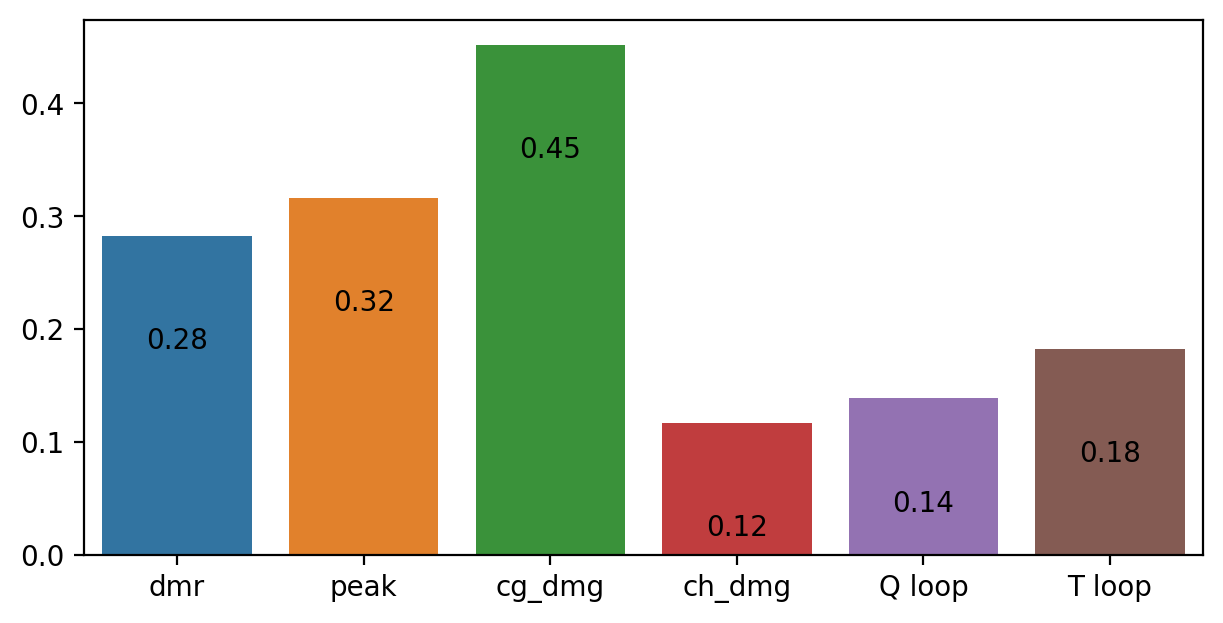

In [24]:
# make the above accuracy as a barplot
accuracy = [test_df['dmr_precict'].sum()/test_df.shape[0], test_df['peak_precict'].sum()/test_df.shape[0], test_df['dmg_cg_precict'].sum()/test_df.shape[0], 
            test_df['dmg_ch_precict'].sum()/test_df.shape[0],test_df['q_loop_precict'].sum()/test_df.shape[0], test_df['t_loop_precict'].sum()/test_df.shape[0]]
methods = ['dmr','peak','cg_dmg','ch_dmg','Q loop','T loop']
fig, ax = plt.subplots(figsize = (6,3), dpi = 200, constrained_layout = True)
sns.barplot(x = methods, y = accuracy, ax = ax)
# annot the accuracy
for i in range(6):
    plt.text(i, accuracy[i]-0.1, round(accuracy[i],2), ha = 'center')

In [25]:
#heatmap = test_df[['dar_precict','dmr_precict','dmg_precict','loop_precict']].copy()
heatmap = test_df[['DEG','dmr_DEG','peak_DEG','q_loop_DEG','t_loop_DEG','dmg_CG_DEG','dmg_CH_DEG']].copy()
heatmap = heatmap.sort_values('DEG')		 #'dar_DEG',	
heatmap

,DEG,dmr_DEG,peak_DEG,q_loop_DEG,t_loop_DEG,dmg_CG_DEG,dmg_CH_DEG
1110008P14Rik,-1.0,1,1,0,0,-1,1
Rbm4b,-1.0,0,1,-1,1,-1,1
Rbm8a,-1.0,0,1,-1,-1,-1,1
Rbmxl1,-1.0,0,-1,1,1,-1,-1
Rcan3,-1.0,0,-1,1,1,-1,-1
...,...,...,...,...,...,...,...
Nrxn3,1.0,1,1,1,1,1,1
Zfp804b,1.0,0,-1,1,1,1,1
Zfp423,1.0,0,1,1,-1,-1,1
Pde1c,1.0,-1,-1,-1,-1,-1,1


<AxesSubplot: >

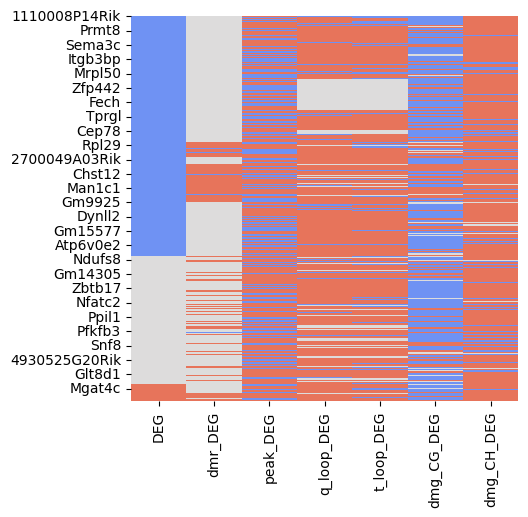

In [26]:
# plot the heatmap
fig, ax = plt.subplots(figsize=(5,5), dpi = 100)   

sns.heatmap(heatmap,
            cmap = 'coolwarm',
            vmin = -1.5, vmax = 1.5,
            cbar = False,
            #col_cluster = False,
            ax = ax
            )


## other

In [ ]:
# find gene that all 4 methods cannot predict?
all_wrong = test_df[(test_df['dmr_precict'] == False) & (test_df['peak_precict'] == False) & (test_df['dmg_precict'] == False) & (test_df['q_loop_precict'] == False) & (test_df['t_loop_precict'] == False)]
all_wrong.shape

KeyError: 'dmg_precict'

In [ ]:
gene_meta['gene_lenth'] = gene_meta['end'] - gene_meta['start']
rna['gene_length'] = rna.index.map(gene_meta.set_index('gene_name')['gene_lenth'].to_dict())

In [ ]:
all_wrong.sample(5)

,dmr_change,q_loop_change,t_loop_change,dmg_change,atac_gene_change,DEG,dmr_DEG,peak_DEG,q_loop_DEG,t_loop_DEG,dmg_DEG,dmr_precict,dmg_precict,q_loop_precict,t_loop_precict,peak_precict
Banp,0.200000,0.064967,0.267494,0.004085,0.035097,0.0,-1,1,1,1,-1,False,False,False,False,False
Ptprt,-0.026667,0.130789,0.148352,-0.015119,0.132816,-1.0,1,1,1,1,1,False,False,False,False,False
Btd,-0.330000,0.053964,0.057640,-0.013962,0.049111,-1.0,1,1,1,1,1,False,False,False,False,False
Gm16083,0.000000,0.000000,0.000000,0.010630,-0.496661,1.0,0,-1,0,0,-1,False,False,False,False,False
Imp3,0.000000,0.000000,0.000000,0.000000,0.081962,-1.0,0,1,0,0,0,False,False,False,False,False


[(0.0, 50.0)]

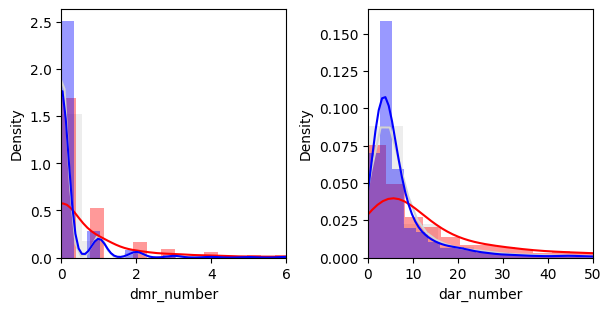

In [ ]:
#dar_df = atac_rpm[atac_rpm['DAR'] != 0]
dar_df = atac_rpm.copy()
toplot = pd.concat([rna['DEG'], dmr['gene_name'].value_counts(),dar_df['gene_name'].value_counts() ], axis = 1)
toplot = toplot.fillna(0)
toplot.columns = ['DEG','dmr_number','dar_number']


fig, axes = plt.subplots(figsize = (6, 3), ncols = 2, dpi = 100, constrained_layout = True) 

ax = axes[0]
sns.distplot(toplot[toplot['DEG'] == 0]['dmr_number'], ax = ax, color = 'lightgrey')
sns.distplot(toplot[toplot['DEG'] == 1]['dmr_number'], ax = ax, color = 'red')
sns.distplot(toplot[toplot['DEG'] == -1]['dmr_number'], ax = ax, color = 'blue')
ax.set(xlim = (0, 6))

ax = axes[1]
sns.distplot(toplot[toplot['DEG'] == 0]['dar_number'], ax = ax, color = 'lightgrey')
sns.distplot(toplot[toplot['DEG'] == 1]['dar_number'], ax = ax, color = 'red')
sns.distplot(toplot[toplot['DEG'] == -1]['dar_number'], ax = ax, color = 'blue')
ax.set(xlim = (0, 50))

In [ ]:
# # scatterplot using toplot
# plt.figure(figsize=(8, 8))
# sns.scatterplot(data=toplot, x='old-young', y='DEG')
# plt.xlabel('aDMR old-young')
# plt.ylabel('RNA log2(old/young)')
# plt.title(f"{ct} aDMR vs RNA")